# <a id='toc1_'></a>[Data Explorations](#toc0_)

Here we are looking at taking our sample of the amazon reviews dataset and exploring it. We divide the section into two parts. 

1. A quick overview of the data - shape, size, features etc.
2. A more detailed look at the data - distributions, correlations etc.


We have our dataset `amz_rev_cleaned.csv` which shall be loaded and used.

**Table of contents**<a id='toc0_'></a>    
- [Data Explorations](#toc1_)    
- [Data Loading and Setup](#toc2_)    
- [Summary of the Data](#toc3_)    
- [Distribution Plots](#toc4_)    
  - [Ratings](#toc4_1_)    
  - [Categories](#toc4_2_)    
- [Some Interesting Plots](#toc5_)    
  - [Ratings vs. Review Length (Word/Character/Sentence Count or Length)](#toc5_1_)    
  - [Reviewers](#toc5_2_)    
    - [Top 10 Reviewers by Number of Reviews](#toc5_2_1_)    
    - [Average Rating against Number of Reviews per Reviewer](#toc5_2_2_)    
    - [Top 10 Reviewers by Length of Reviews](#toc5_2_3_)    
    - [Top 10 Reviewers by Average Rating (with at least 10 reviews)](#toc5_2_4_)    
    - [Top 10 Reviewers by Review Count](#toc5_2_5_)    
  - [Products](#toc5_3_)    
    - [Top 10 Products by Number of Reviews](#toc5_3_1_)    
    - [Product Average Rating vs. Number of Reviews](#toc5_3_2_)    
    - [Number of Reviews per Product over Time](#toc5_3_3_)    
    - [Average Rating per Product over Time](#toc5_3_4_)    
  - [Categories](#toc5_4_)    
    - [Top 10 Categories by Number of Reviews](#toc5_4_1_)    
    - [Top 10 Categories by Average Rating](#toc5_4_2_)    
    - [Top 10 Categories by Average Review Length](#toc5_4_3_)    
    - [Average Rating of Categories over Time](#toc5_4_4_)    
    - [Top Brands in each Category by their Average Rating](#toc5_4_5_)    
    - [Top Brands in each Category by the Number of Reviews](#toc5_4_6_)    
  - [Reviews and Review Text](#toc5_5_)    
    - [Top 10 Reviews by Length](#toc5_5_1_)    
    - [Average Review Length over Time](#toc5_5_2_)    
    - [Number of Reviews over Time](#toc5_5_3_)    
    - 
  - [Brands](#toc5_6_)    
    - [Top 10 Brands by Number of Reviews](#toc5_6_1_)    
    - [Top 10 Brands by Average Rating](#toc5_6_2_)    
    - [Average Rating of Brands over Time for Top 10 Brands](#toc5_6_3_)    
- [Sentiment Analysis](#toc6_)    
  - [Sentiment Lexicons](#toc6_1_)    
  - [Sentiment per Review](#toc6_2_)    
    - [Most Positive Reviews](#toc6_2_1_)    
    - [Most Negative Reviews](#toc6_2_2_)    
    - [Most Positive Reviewers](#toc6_2_3_)    
    - [Most Negative Reviewers](#toc6_2_4_)    
    - [Distribution of Sentiment Scores](#toc6_2_5_)    
  - [Sentiment per Product](#toc6_3_)    
    - [Most Positive Products](#toc6_3_1_)    
    - [Most Negative Products](#toc6_3_2_)    
  - [Sentiment per Category](#toc6_4_)    
    - [Most Positive Categories](#toc6_4_1_)    
    - [Most Negative Categories](#toc6_4_2_)    
  - [Sentiment per Brand](#toc6_5_)    
    - [Most Positive Brands](#toc6_5_1_)    
    - [Most Negative Brands](#toc6_5_2_)    
  - [Feature Engineering](#toc6_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Loading and Setup](#toc0_)

In [76]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk


In [78]:
# load data
data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_rev_cleaned.csv', low_memory=True)

# <a id='toc3_'></a>[Summary of the Data](#toc0_)

In [62]:
# view the data 
display(data.head(4))

# shape of data
print("Shape of Data:", data.shape, '\n')

# columns in data
print("Columns in Data:", data.columns, '\n')

,reviewerID,reviewerName,reviewTime,asin,title,brand,description,reviewText,category_x,overall,normalized_rating
0,A3WJELEV137U,John Bennett,2015-06-05,0001526863,steve green hide em in your heart 13 bible mem...,steve green,steve green hide em in your heart 13 bible mem...,Product worked as advertised and am pleased wi...,movies and tv,5.0,1.0
1,A3OJM6TXMK3J53,samson,2015-12-05,0005164885,christmas eve and other stories,trans siberian orchestra,this is a concept album all the way with tales...,nice to hear this cd beautiful,cds and vinyl,5.0,1.0
2,A14YR7QK3ASFFW,Amazon Customer,2001-04-24,0005465079,forgiven,don francisco,1 jesus lord of the way i feel 2 jehoshaphat 3...,That one song has to be one of the best in CCM...,cds and vinyl,5.0,1.0
3,A1VE933MFXTG18,sj,2016-02-21,0307142493,santa claus is comin to town vhs,fred astaire,this is the vhs movie santa claus is comin to ...,"I just love these older movies, They really ar...",movies and tv,5.0,1.0
4,A3VRRAZTTVF3SH,brienna,2014-12-13,0307142493,santa claus is comin to town vhs,fred astaire,this is the vhs movie santa claus is comin to ...,Love this movie at christmas time,movies and tv,5.0,1.0
5,A2AXULQJ2Q88HX,Amazon Customer,2016-07-21,0310432065,trifold organizer black xxl book and bible cover,visit amazons zondervan page,NaN,Wonderful,office products,5.0,1.0
6,A2B2M5YQZPBOA3,Sarah Lee,2015-11-07,0310806607,compass med book and bible cover,visit amazons zondervan page,made from durable nylon material this sporty b...,I purchased this for my son's Boy Scout book w...,office products,5.0,1.0
7,A2DAMI6AVZYTP9,Ann McDonald,2016-02-06,0310821800,reptile leather extra large wine bible cover,visit amazons zondervan page,featuring metal accents pursestyle handles and...,Met my expectations. The only thing I would l...,office products,5.0,1.0
8,A21PKYWMOJZ4VV,Heaven Bound,2013-01-08,0310821800,reptile leather extra large wine bible cover,visit amazons zondervan page,featuring metal accents pursestyle handles and...,"Love Love, this Bible cover. The ladies at ch...",office products,5.0,1.0
9,AH03Q5EW4MIO0,Inez,2013-08-29,0310821800,reptile leather extra large wine bible cover,visit amazons zondervan page,featuring metal accents pursestyle handles and...,I did not find any leather in this Bible Cover...,office products,1.0,0.0


Shape of Data: (496219, 11) 

Columns in Data: Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating'],
      dtype='object') 



In [63]:
# summary of data
print("Number of reviews:", data.shape[0])
print("Number of Customers:", data.reviewerID.unique().size)
print("Number of unique products:", data.asin.nunique())
print("Number of unique reviewers:", data.reviewerID.nunique())
print("Number of unique brands:", data.brand.nunique())
print("Number of unique categories:", data.category_x.nunique())

# numerical summary of data
print("\n",data.describe())

Number of reviews: 496219
Number of Customers: 339625
Number of unique products: 251615
Number of unique reviewers: 339625
Number of unique brands: 68502
Number of unique categories: 26

              overall  normalized_rating
count  496219.000000      496219.000000
mean        4.383623           0.845906
std         1.086642           0.271661
min         1.000000           0.000000
25%         4.000000           0.750000
50%         5.000000           1.000000
75%         5.000000           1.000000
max         5.000000           1.000000


# Missing Data Visualised


 There are missing values in the data.


,reviewerID,reviewerName,reviewTime,asin,title,brand,description,reviewText,category_x,overall,normalized_rating
5,A2AXULQJ2Q88HX,Amazon Customer,2016-07-21,0310432065,trifold organizer black xxl book and bible cover,visit amazons zondervan page,NaN,Wonderful,office products,5.0,1.00
42,A1GQAKL9CGQLP1,L. M. Keefer,2016-05-05,0439499887,high frequency level 2 word wall words,scholastic,NaN,I bought this book for my niece as she is a bi...,office products,5.0,1.00
43,ARILW21EJ5490,Skylar,2017-02-05,0439499887,high frequency level 2 word wall words,scholastic,NaN,gift for granddaughter,office products,4.0,0.75
48,A1V3HIL2GPYKC,Jillian S,2018-04-23,0486413012,butterfly notebook,sovak,NaN,I like that the pages are not lined. I can tak...,office products,5.0,1.00
50,AKTE5B2J16JX4,Windwhispers,2015-04-26,0528002279,rand mcnally usa wall map,rand mcnally and company,NaN,If you are looking for a durable wall map of t...,office products,5.0,1.00



 Columns with Missing Data:
 reviewerID               0
reviewerName            93
reviewTime               0
asin                     0
title                    3
brand                  137
description          60249
reviewText               0
category_x               0
overall                  0
normalized_rating        0
dtype: int64


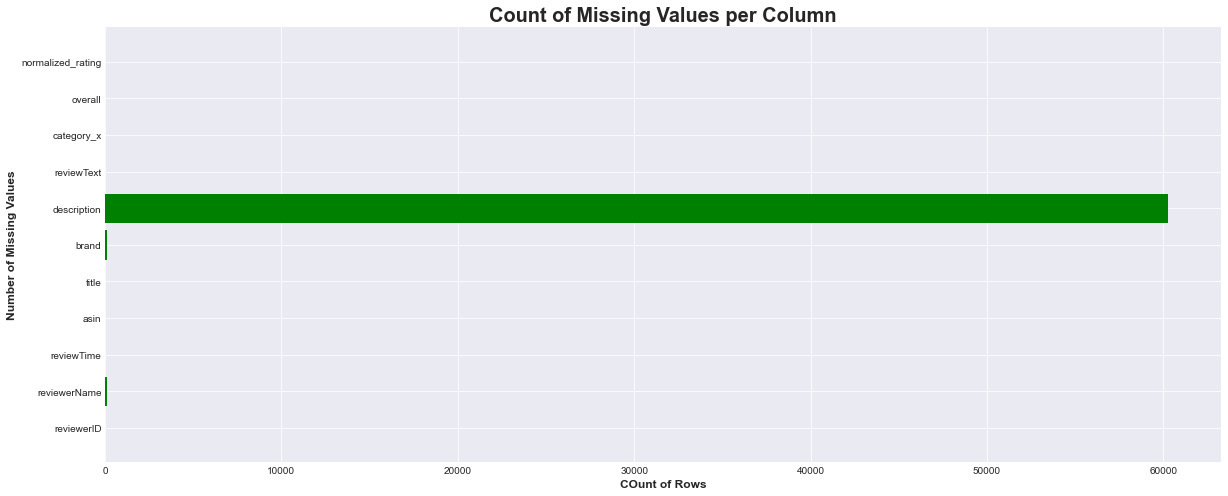

In [64]:
# Missing values
is_na = data.isna().any().any()

# if there are NA values in columns -> show rows, show number of NAs per column
if is_na:
    print("\n There are missing values in the data.")
    display(data[data.isna().any(axis=1)].head(5))
    print("\n Columns with Missing Data:\n", data.isna().sum())
    missing_values_count = data.isna().sum()
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(20, 8))
    plt.barh(y=missing_values_count.index, width=missing_values_count.values, color="green")
    plt.xlabel("Count of Rows", fontsize=12, fontweight='semibold')
    plt.ylabel("Number of Missing Values", fontsize=12, fontweight='semibold')
    plt.title("Count of Missing Values per Column", fontsize=20, fontweight='bold')
    plt.show()

else:
    print("There are no missing values in the data.")

# <a id='toc4_'></a>[Distribution Plots](#toc0_)

In [65]:
data.columns

Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating'],
      dtype='object')

## <a id='toc4_1_'></a>[Ratings](#toc0_)

Proportion of Review Ratings:
 5.0    0.675992
4.0    0.163936
3.0    0.075277
1.0    0.047501
2.0    0.037294
Name: overall, dtype: float64


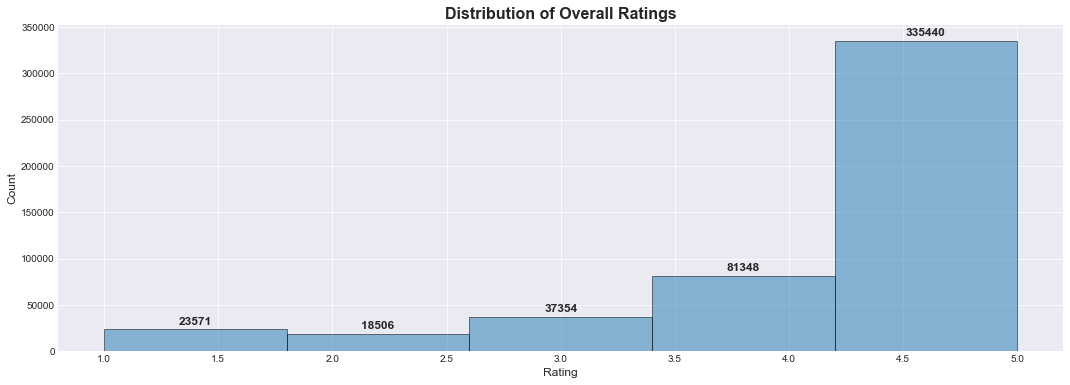

In [66]:
# Distribution of ratings
print("Proportion of Review Ratings:\n", data['overall'].value_counts(normalize=True))

# Generate data
ratings = data['overall']

# Plot the histogram
fig, ax = plt.subplots(figsize=(18, 6))
n, bins, patches = ax.hist(ratings, bins=5, edgecolor='black', alpha=0.5)

for rect in patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                weight='semibold',
                fontsize=12)

# Add title and axis labels
ax.set_title("Distribution of Overall Ratings", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

## <a id='toc4_2_'></a>[Categories](#toc0_)

Proportion of Reviews Categories:
 electronics                   5.026208
pet supplies                  5.023588
cell phones                   5.018953
toys and games                5.012908
office products               5.011900
kindle store                  5.005250
automotive                    5.003436
video games                   4.999607
musical instruments           4.994166
grocery and gourmet food      4.990941
prime pantry                  4.989531
home and kitchen              4.984896
patio lawn and garden         4.980664
tools and home improvement    4.971797
arts crafts                   4.962728
industrial                    4.919602
sports and outdoors           4.853502
cds and vinyl                 4.467584
movies and tv                 4.280771
software                      2.400351
clothing shoes and jewelry    2.166785
beauty                        0.834914
gift cards                    0.538069
magazine subscriptions        0.453429
digital music                

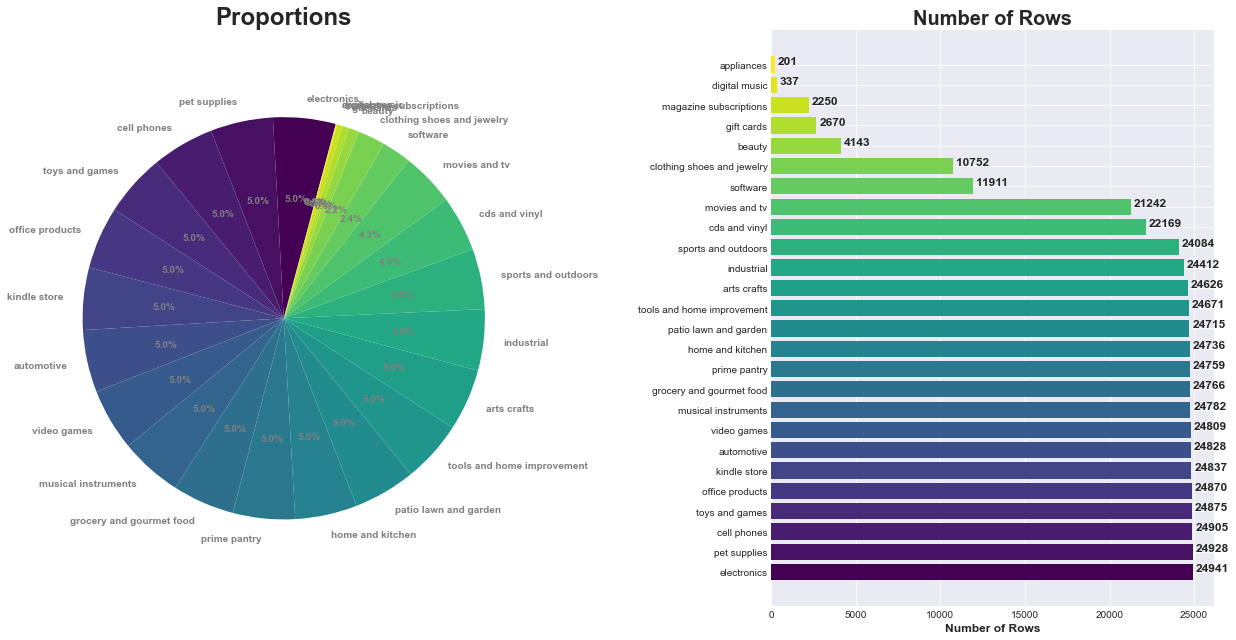

In [67]:
# distributions for categorical variables (category)
print("Proportion of Reviews Categories:\n", data.category_x.value_counts(normalize=True)*100)

# biggest companies (most movies) - over 100 movies
value_counts_cat = data.category_x.value_counts()
colors = cm.viridis(np.linspace(0, 1, len(value_counts_cat)))


# Production Companies mix - pie
fig = plt.figure(figsize=(20, 12)) # create figure
plt.subplot(1, 2, 1)
plt.pie(value_counts_cat, labels=value_counts_cat.index, 
       autopct='%.1f%%', startangle=75, colors=colors, textprops={'color':'white', 'weight':'bold'})
plt.title("Proportions", fontsize=24, fontweight='bold')
plt.axis('equal')


# Production Companies with most movies - bar
plt.subplot(1, 2, 2)
bar = plt.barh(y=value_counts_cat.index, width=value_counts_cat.values, color=colors)
plt.title("Number of Rows", fontsize=20, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 10), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

# adjust plot
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)



# <a id='toc5_'></a>[Some Interesting Plots](#toc0_)





## <a id='toc5_2_'></a>[Reviewers](#toc0_)

### <a id='toc5_2_1_'></a>[Top 10 Reviewers by Number of Reviews](#toc0_)

In [68]:
# How many customers
print("Number of Customers:", data.reviewerID.unique().size)

# Count Reviews and Average Rating per Customer
cust_data = data.groupby(['reviewerID']).agg({"overall": ["count", "mean"]})
cust_data.columns = ['count_rev', 'mean_rat']
cust_data['mean_rat'] = np.round(cust_data.mean_rat,3)
display(cust_data.head(4))

Number of Customers: 339625


,count_rev,mean_rat
reviewerID,,
A0020356UF96ZV361ST,1,4.0
A0034986DWR7WEDQN0GV,1,5.0
A00463782V7TKAP9EMNL,2,4.5
A007917716EGEEP4D8LB,1,5.0


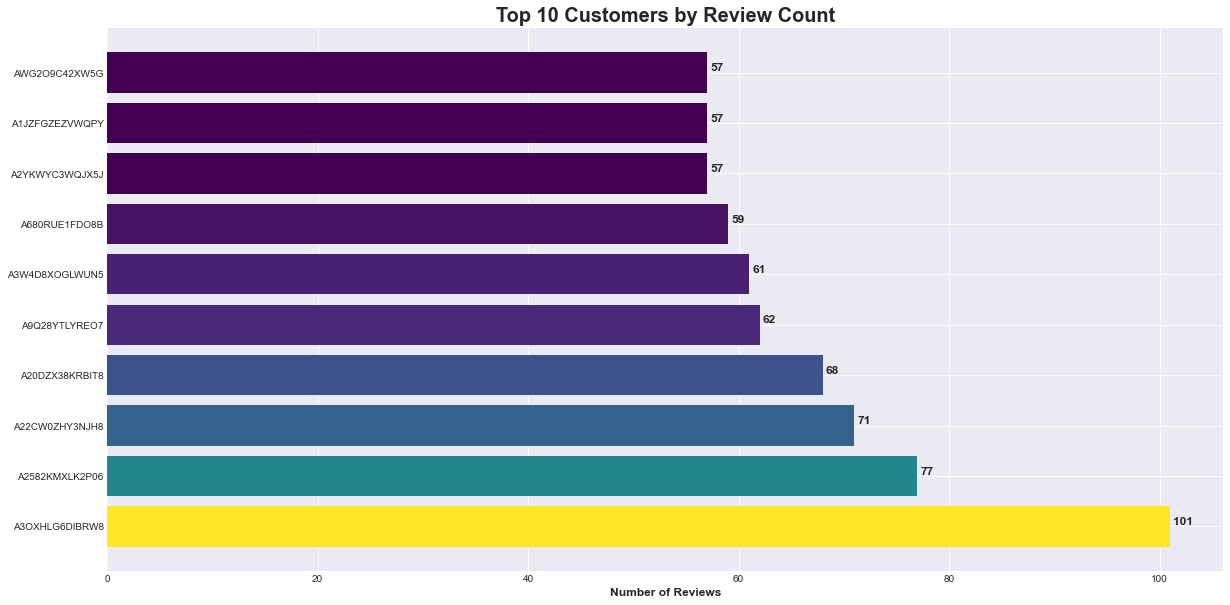

In [69]:
# Plot of Most - bar plot
plt.style.use('seaborn-darkgrid')
sample_top = cust_data.sort_values(['count_rev'], ascending=False).head(10)
count_min = sample_top.count_rev.min() # get range
count_max = sample_top.count_rev.max()
count_norm = (sample_top.count_rev - count_min) / (count_max - count_min) # Normalize 
colors = cm.viridis(count_norm) # Use a colormap to map vote average


fig = plt.figure(figsize=(20, 10))
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

### Distribution of Number of Reviews

### <a id='toc5_2_2_'></a>[Average Rating against Number of Reviews per Reviewer](#toc0_)

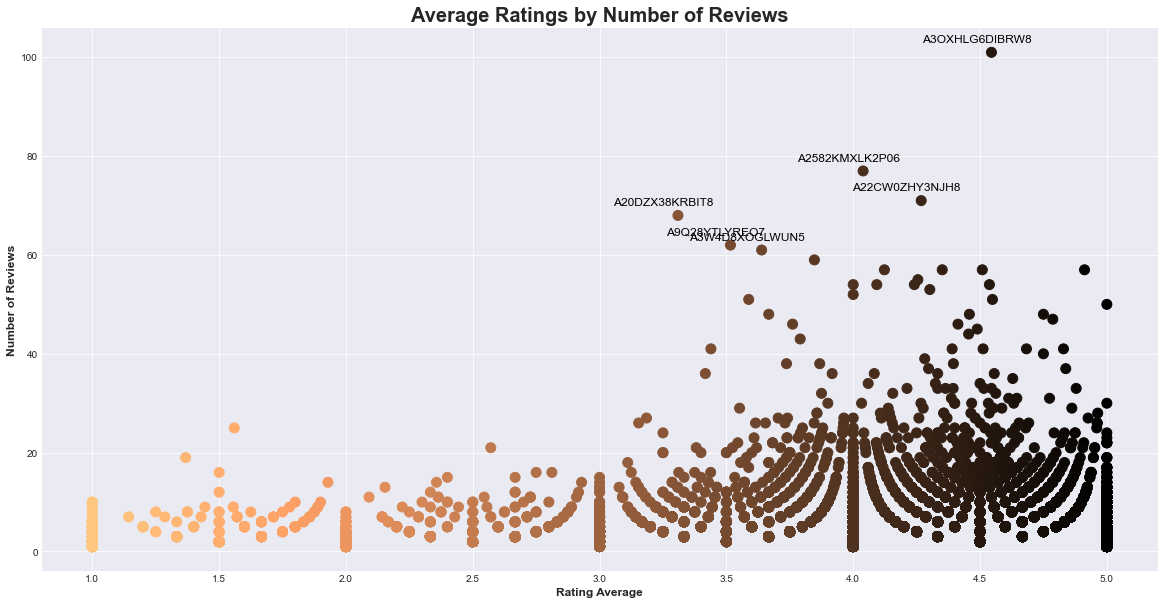

In [70]:

# Plot of Average Rating vs Count Reviews - scatter plot
fig = plt.figure(figsize=(20, 10))
plt.scatter(cust_data.mean_rat, cust_data.count_rev, c=cust_data.mean_rat, cmap='copper_r', s=100)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data.index):
    if (cust_data.count_rev[i] > 60):
        plt.annotate(id, (cust_data.loc[cust_data.index==id, "mean_rat"], cust_data.loc[cust_data.index==id, "count_rev"]), textcoords="offset points", xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()

### <a id='toc5_2_3_'></a>[Top 10 Reviewers by Length of Reviews](#toc0_)

In [71]:
nltk.download('punkt')

# Function to count sentences in a given text
def count_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

# Function to count words in a given text
def count_words(text):
    words = text.split()
    return len(words)

# Function to count characters in a given text
def count_characters(text):
    return len(text)



# Apply the function to the 'reviewText' column
data['review_sentence_count'] = data['reviewText'].apply(count_sentences)

# Apply the function to the 'reviewText' column
data['review_word_count'] = data['reviewText'].apply(count_words)

# Apply the function to the 'reviewText' column
data['review_character_count'] = data['reviewText'].apply(count_characters)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pavansingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
# see data
display(data[['reviewText', 'review_character_count', 'review_word_count', 'review_sentence_count']].head(3))

print(data.reviewText[0])
print(data.reviewText[1])
print(data.reviewText[2])

,reviewText,review_character_count,review_word_count,review_sentence_count
0,Product worked as advertised and am pleased wi...,57,9,2
1,nice to hear this cd beautiful,31,6,1
2,That one song has to be one of the best in CCM...,367,72,8


Product worked as advertised and am pleased with results.
nice to hear this cd  beautiful
That one song has to be one of the best in CCM. It tells the story of the resurrection from Peter's eyes. It is very true to the Bible in its lyrics. Adam Where Are You is another solid song. This album has been forgotten by people who like heavier music. Don't let the long hair and early 70's look fool you. This album is for people of all ages. Truely sensational!


In [74]:
# top 10 longest reviews
display(data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10))

# view the review
data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10).values


,reviewerID,reviewerName,reviewTime,asin,title,brand,description,reviewText,category_x,overall,normalized_rating,review_sentence_count,review_word_count,review_character_count,review_len
170273,A2LEIANN1UZTHP,brainout,2012-09-11,B001YTK3XK,brother mfc8480dn highperformance laser allino...,brother,the mfc8480dn is a highperformance laser allin...,"UPDATE, 12/09/13: this machine is WAY OVERPRIC...",office products,2.0,0.25,366,5579,32602,32602
136490,A25XZFC0A27OGF,bobbler,2011-07-25,B0015NV5BE,ranco etc111000 digital cold temperature contr...,ranco,ranco etc111000 digital cold temperature contr...,FOR OPERATING A REFRIGERATOR (or freezer ) ONL...,industrial,5.0,1.00,560,5966,32184,32184
227521,A24HWYHR28JJ7A,AmazonCustomer,2012-08-01,B005IB6MM6,corel photo and video pro x4 ultimate bundle o...,corel,with our best photo and videoediting software ...,Fuzzy Wuzzy's Summary:\n Highly recommended w...,software,5.0,1.00,171,5021,31644,31644
260192,A24HWYHR28JJ7A,AmazonCustomer,2013-09-18,B009066NOC,paintshop pro x5 ultimate old version,corel,corel paintshop pro x5 ultimate provides every...,Fuzzy Wuzzy's Summary:\n Highly recommended w...,software,5.0,1.00,174,4903,30392,30392
19591,A2LEIANN1UZTHP,brainout,2012-08-10,B00005AFI1,microsoft office xp professional upgrade old v...,microsoft,microsoft office xp professional puts the feat...,UPDATE 4/23/13: if you've installed Windows 7...,software,3.0,0.50,346,5118,29652,29652
260180,A24HWYHR28JJ7A,AmazonCustomer,2013-09-18,B009066EOG,paintshop pro x5 old version,corel,corel paintshop pro x5 provides all of the pho...,Fuzzy Wuzzy's Summary:\n Highly recommended w...,software,5.0,1.00,168,4728,29240,29240
460616,A2VLMACQXTDKKP,brdavis9,2015-12-02,B017V4OHIS,nokia lumia 950 white 32gb atampt,nokia,microsoft nokia lumia 950 rm1105 32gb atampt ...,"WARNING: This is a LONG, complicated review. I...",cell phones,5.0,1.00,436,4992,29091,29091
227266,A24HWYHR28JJ7A,AmazonCustomer,2012-07-22,B005HTIWIQ,corel paintshop pro x4 ultimate old version,corel,corel paintshop pro x4 ultimate gives you the ...,Fuzzy Wuzzy's Summary:\n Highly recommended w...,software,5.0,1.00,147,4255,27037,27037
290135,AZ2YLC0GWTAH2,D.P.,2013-08-08,B00CB5ERCY,wwe ecw unreleased vol 2,various,following the success of ecw unreleased vol 1 ...,"With the high sales of the first volume, WWE q...",movies and tv,5.0,1.00,125,4364,24084,24084
17739,A1JLJOU8I57H13,The Distinguished Anarchist,2016-10-13,B00004Y57G,final fantasy ix,by square enix,one of the all time most fun and popular rpg s...,"Back in January of 2000, SquareSoft was in the...",video games,3.0,0.50,182,4071,23832,23832


### <a id='toc5_2_4_'></a>[Top 10 Reviewers by Average Rating (with at least 10 reviews)](#toc0_)


### <a id='toc5_2_5_'></a>[Top 10 Reviewers by Review Count](#toc0_)


## <a id='toc5_3_'></a>[Products](#toc0_)

### <a id='toc5_3_1_'></a>[Top 10 Products by Number of Reviews](#toc0_)

In [43]:
# How many items/products?
print("Number of Products:", data.asin.unique().size)

# Number reviews and average ratings per product
prod_data = data.groupby(['asin']).agg({"overall": ["count", "mean"]})
prod_data.columns = ['count_rev', 'mean_rat']
prod_data['mean_rat'] = np.round(prod_data.mean_rat,3)
display(prod_data.head(4))

Number of Products: 251615


,count_rev,mean_rat
asin,,
0001526863,1,5.0
0005164885,1,5.0
0005465079,1,5.0
0307142493,2,5.0


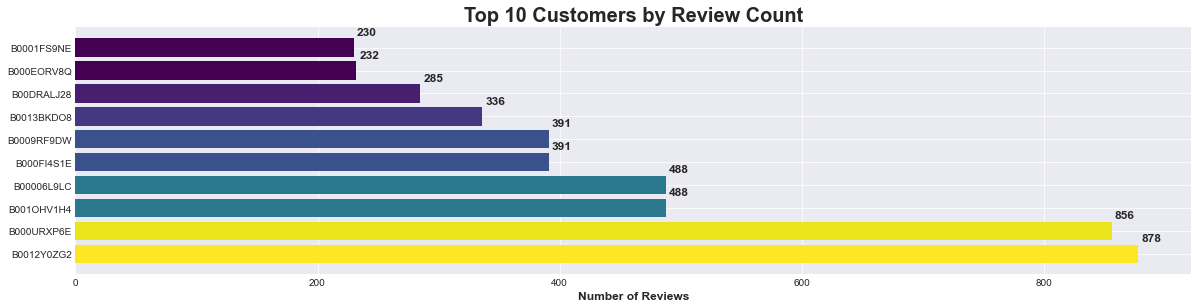

In [45]:
# Plot of Most / Fewest Reviews 
plt.style.use('seaborn-darkgrid')
sample_top = prod_data.sort_values(['count_rev'], ascending=False).head(10)
count_min = sample_top.count_rev.min() # get range
count_max = sample_top.count_rev.max()
count_norm = (sample_top.count_rev - count_min) / (count_max - count_min) # Normalize 
colors = cm.viridis(count_norm) # Use a colormap to map vote average

fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


### <a id='toc5_3_2_'></a>[Product Average Rating vs. Number of Reviews](#toc0_)

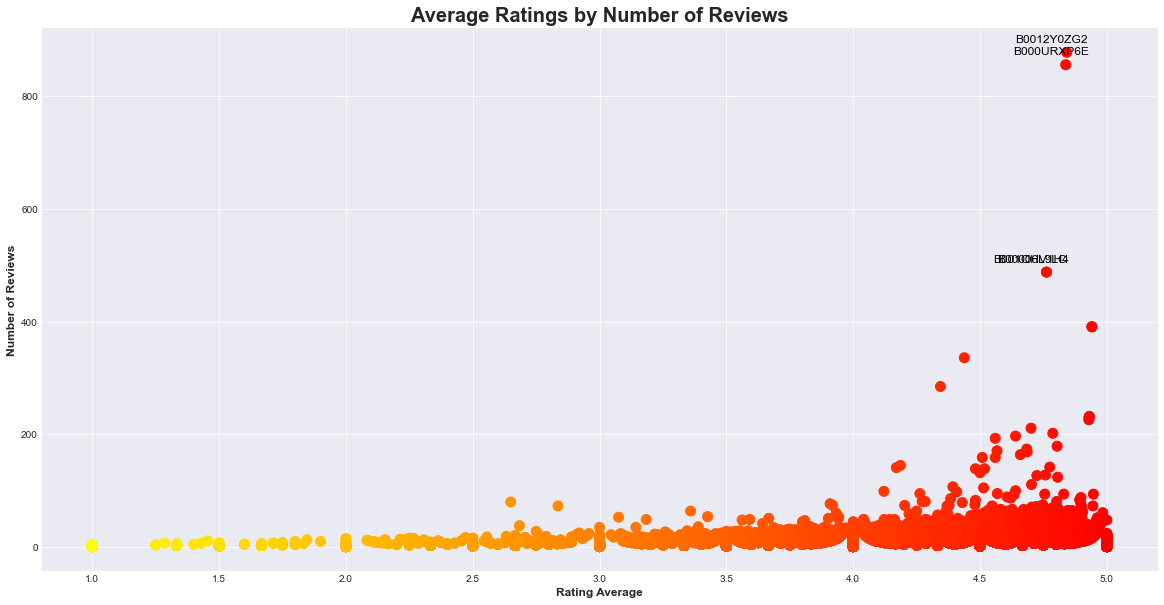

In [47]:
# Plot of Average Rating vs Count Reviews
fig = plt.figure(figsize=(20, 10))

plt.scatter(prod_data.mean_rat, prod_data.count_rev, c=prod_data.mean_rat, cmap='autumn_r', s=100)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(prod_data.index):
    if (prod_data.count_rev[i] >= 400):
        if id == 'B0001FS9NE':
            xytext = (15, -15)
        else: xytext=(-15,10)
        plt.annotate(id, (prod_data.loc[prod_data.index==id, "mean_rat"], prod_data.loc[prod_data.index==id, "count_rev"]), textcoords="offset points",xytext=xytext, ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()


### <a id='toc5_3_3_'></a>[Number of Reviews per Product over Time](#toc0_)

### <a id='toc5_3_4_'></a>[Average Rating per Product over Time](#toc0_)

***
## <a id='toc5_4_'></a>[Categories](#toc0_)

### <a id='toc5_4_1_'></a>[Top 10 Categories by Number of Reviews](#toc0_)

### <a id='toc5_4_2_'></a>[Top 10 Categories by Average Rating](#toc0_)

### <a id='toc5_4_3_'></a>[Top 10 Categories by Average Review Length](#toc0_)

### <a id='toc5_4_4_'></a>[Average Rating of Categories over Time](#toc0_)

### <a id='toc5_4_5_'></a>[Top Brands in each Category by their Average Rating](#toc0_)

### <a id='toc5_4_6_'></a>[Top Brands in each Category by the Number of Reviews](#toc0_)


***
## <a id='toc5_5_'></a>[Reviews and Review Text](#toc0_)

### Review Length vs. Rating

### <a id='toc5_5_1_'></a>[Top 10 Reviews by Length](#toc0_)

### <a id='toc5_5_2_'></a>[Average Review Length over Time](#toc0_)

### <a id='toc5_5_3_'></a>[Number of Reviews over Time](#toc0_)

***
## <a id='toc5_6_'></a>[Brands](#toc0_)

### <a id='toc5_6_1_'></a>[Top 10 Brands by Number of Reviews](#toc0_)

### <a id='toc5_6_2_'></a>[Top 10 Brands by Average Rating](#toc0_)

### <a id='toc5_6_3_'></a>[Average Rating of Brands over Time for Top 10 Brands](#toc0_)





***
# <a id='toc6_'></a>[Sentiment Analysis](#toc0_)



***
## <a id='toc6_2_'></a>[Sentiment per Review](#toc0_)

### <a id='toc6_2_1_'></a>[Most Positive Reviews](#toc0_)

### <a id='toc6_2_2_'></a>[Most Negative Reviews](#toc0_)

### <a id='toc6_2_3_'></a>[Most Positive Reviewers](#toc0_)

### <a id='toc6_2_4_'></a>[Most Negative Reviewers](#toc0_)

### <a id='toc6_2_5_'></a>[Distribution of Sentiment Scores](#toc0_)



***
## <a id='toc6_3_'></a>[Sentiment per Product](#toc0_)

### <a id='toc6_3_1_'></a>[Most Positive Products](#toc0_)

### <a id='toc6_3_2_'></a>[Most Negative Products](#toc0_)



***
## <a id='toc6_4_'></a>[Sentiment per Category](#toc0_)

### <a id='toc6_4_1_'></a>[Most Positive Categories](#toc0_)

### <a id='toc6_4_2_'></a>[Most Negative Categories](#toc0_)



***
## <a id='toc6_5_'></a>[Sentiment per Brand](#toc0_)

### <a id='toc6_5_1_'></a>[Most Positive Brands](#toc0_)

### <a id='toc6_5_2_'></a>[Most Negative Brands](#toc0_)



***
## <a id='toc6_6_'></a>[Feature Engineering](#toc0_)
